# CHAMPS Dataset Scalar Coupling

- Michael Follari
- [Predicting Molecular Properties](https://www.kaggle.com/c/champs-scalar-coupling)
- UNCG Physics 2020
- Dr. Ajay Covell

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

More plot styling can be found [here.](https://matplotlib.org/tutorials/introductory/customizing.html)

In [2]:
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = [16,9]
plt.rcParams.update({'font.size': 16})

# Data Sets
* structures.csv - `structures_df` - Contains the xyz coordinates of each atom within each molecule
* train.csv - `train_df` - Contains the type and scalar_coupling_constant between every atoms pair within each molecule.

### The following code imports both the above datasets, merges, and adds additional columns.
* Only added column is currently displacement between the two atoms in the bond.

In [4]:
structure_path = 'D:\data\champs\zip\structures.zip'
train_path = 'D:\data\champs\zip\\train.zip'
test_path = 'D:\data\champs\zip\\test.zip'
train_bond_path = 'D:\data\champs\zip\\train_bond.gz'
test_bond_path = 'D:\data\champs\zip\\test_bond.gz'

In [3]:
# Load in Structure and Train CSV files, merge, calculate values, and save to Molecules CSV
def merge_struct_dataset(path_struct, path_train, path_merged):
    
    # load in struct and train datasets
    structures_df = pd.read_csv(path_struct)
    train_df = pd.read_csv(path_train)

    # Merge structure data onto train_df for each atom (atom_index_0 and atom_index_1). Hold in mol_df
    mol_df = train_df.merge(structures_df, left_on=['molecule_name','atom_index_0'], right_on=['molecule_name','atom_index'])
    mol_df = mol_df.merge(structures_df, left_on=['molecule_name','atom_index_1'], right_on=['molecule_name','atom_index'])

    # drop extra columns from merge and rename
    mol_df.drop(['atom_index_x','atom_index_y'], axis=1, inplace=True)
    mol_df.rename(columns={'atom_x':'atom_0','atom_y':'atom_1','x_x':'x_0','y_x':'y_0','z_x':'z_0','x_y':'x_1','y_y':'y_1','z_y':'z_1'}, inplace=True)
    
    # Append new columns with calculated values
    mol_df = append_molecule_calculations(mol_df)
    
    # Save to CSV
    mol_df.to_csv(path_merged, compression="gzip")
    
# adds new columns with calculated values to molecule df
def append_molecule_calculations(mol_df):
    mol_df = calculate_molecule_displacement(mol_df)
    return mol_df
    
# calculates the displacement for each atom interaction 
def calculate_molecule_displacement(mol_df):
    mol_df['displacement'] = mol_df.apply(lambda row: calc_disp(row), axis=1)
    return mol_df
    
# calculcates displacement on a passed row
def calc_disp(row):
    return np.linalg.norm(np.array([row['x_1']-row['x_0'],row['y_1']-row['y_0'],row['z_1']-row['z_0']]))

### Merge strucutre data with train and test data sets.
* Only need to do once to generaete and save to dataframes as CSV files, then load as normla CSV

In [5]:
# merge_struct_dataset(structure_path, train_path, train_bond_path)
# merge_struct_dataset(structure_path, test_path, test_bond_path)

#### Load merged datasets

In [6]:
bond_df = pd.read_csv( train_bond_path )

In [24]:
bond_df

,Unnamed: 0,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1,displacement
0,0,0,dsgdb9nsd_000001,1,0,1JHC,84.807600,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001,1.091953
1,1,4,dsgdb9nsd_000001,2,0,1JHC,84.807400,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001,1.091952
2,2,7,dsgdb9nsd_000001,3,0,1JHC,84.809300,H,-0.540815,1.447527,-0.876644,C,-0.012698,1.085804,0.008001,1.091946
3,3,9,dsgdb9nsd_000001,4,0,1JHC,84.809500,H,-0.523814,1.437933,0.906397,C,-0.012698,1.085804,0.008001,1.091948
4,4,1,dsgdb9nsd_000001,1,2,2JHH,-11.257000,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277,1.783120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4659071,4659071,4659040,dsgdb9nsd_133884,13,17,3JHH,3.062820,H,2.582409,-1.260138,0.293499,H,1.126550,-1.348733,-1.933838,2.662406
4659072,4659072,4659067,dsgdb9nsd_133884,16,17,3JHH,0.789559,H,-0.084531,1.110807,-1.796741,H,1.126550,-1.348733,-1.933838,2.744968
4659073,4659073,4659038,dsgdb9nsd_133884,13,14,3JHH,1.005250,H,2.582409,-1.260138,0.293499,H,2.087537,1.391489,0.548687,2.709455
4659074,4659074,4659039,dsgdb9nsd_133884,13,15,3JHH,1.005260,H,2.582409,-1.260138,0.293499,H,1.542918,0.547487,2.023550,2.709451


In [9]:
test_bond_df = pd.read_csv( test_bond_path )

In [10]:
test_bond_df.head()

,Unnamed: 0,id,molecule_name,atom_index_0,atom_index_1,type,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1,displacement
0,0,4659076,dsgdb9nsd_000004,2,0,2JHC,H,-1.661639,0.0,1.0,C,0.599539,0.0,1.0,2.261178
1,1,4659079,dsgdb9nsd_000004,3,0,1JHC,H,1.661639,0.0,1.0,C,0.599539,0.0,1.0,1.062099
2,2,4659077,dsgdb9nsd_000004,2,1,1JHC,H,-1.661639,0.0,1.0,C,-0.599539,0.0,1.0,1.062099
3,3,4659080,dsgdb9nsd_000004,3,1,2JHC,H,1.661639,0.0,1.0,C,-0.599539,0.0,1.0,2.261178
4,4,4659078,dsgdb9nsd_000004,2,3,3JHH,H,-1.661639,0.0,1.0,H,1.661639,0.0,1.0,3.323277


In [7]:
# test_df = pd.read_csv( test_path )
# struct_df = pd.read_csv( structure_path )

# Exploration 1
* Simple Regression of Scalar Coupling & Atom Displacement.

### The different kinds of bonds present in the data

In [13]:
bond_types = bond_df.type.unique()
print(bond_types)

['1JHC' '2JHH' '1JHN' '2JHN' '2JHC' '3JHH' '3JHC' '3JHN']


In [14]:
def get_bond_type(df, bond_type):
    # Return df of just passed type of bond
    return df[ df.type == bond_type]
    
def get_regression_datas(df):
    # Split and return into x and y arrays
    x = df['displacement'].values
    y = df['scalar_coupling_constant'].values
    return [x,y]

# Linear Regression
- [scikit Learn Linear Regression](https://scikit-learn.org/stable/modules/linear_model.html)

In [25]:
def linear_fit_plot(df, bond_type, n=0):
    
    # Get x and y arrays for bond type
    x,y = get_regression_datas( get_bond_type(df, bond_type) )
    
    # Linear Regression fit
    reg = linear_fit(x, y)
    
    # How many data points to plot
    if( n==0 ):
        n = x.size
    # Split n samples
    x_n = x[:n]
    y_n = y[:n]
    
    # Scatter Plot of data points
    plt.scatter(x_n, y_n,c='b')
    
    plt.plot(x_n, line_points_array(x_n, reg.coef_, reg.intercept_), c='r', linewidth=3, linestyle='solid')

    # Plot linear fit
    plt.xlim([x.min() * 0.99,x.max() * 1.01])
    plt.ylim([y.min() * 0.99,y.max() * 1.01])
    plt.title("Linear Regression Fit of Scalar-Coupling-Constant vs. Bond Displacement : " + str(bond_type), size=22)
    plt.xlabel('Displacement', size=22)
    plt.ylabel('Scalar Coupling Constant', size=22)
    plt.show()

In [26]:
def linear_fit(x,y):
    # Linear Regression fit
    reg = linear_model.LinearRegression()
    reg.fit( x.reshape(-1,1), y )
    return reg

def line_points_array(x_array, coef, intercept):
    return [line_func(x, coef, intercept) for x in x_array]

def line_func(x, coef, intercept):
    return x*coef + intercept

### Generate Linear Regression fit for each bond type

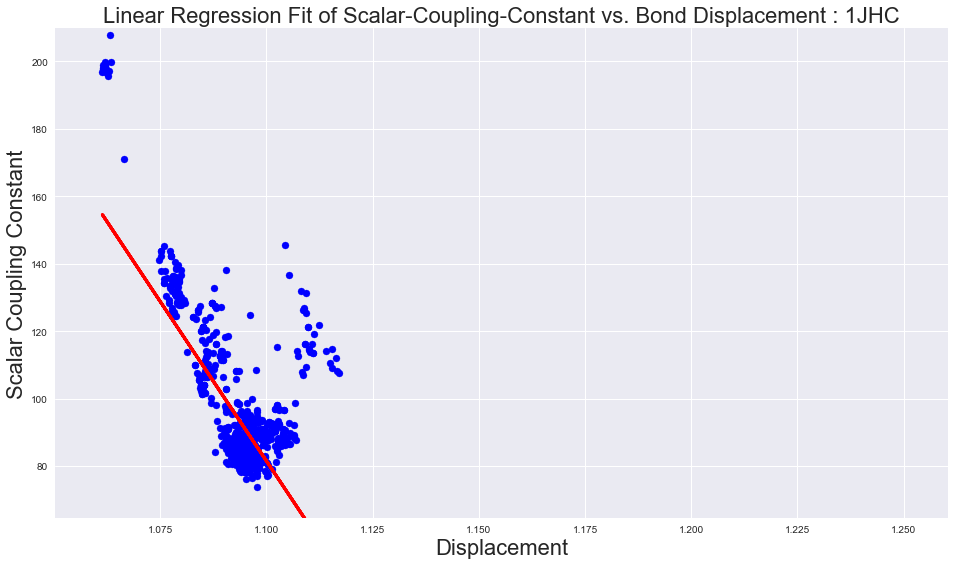

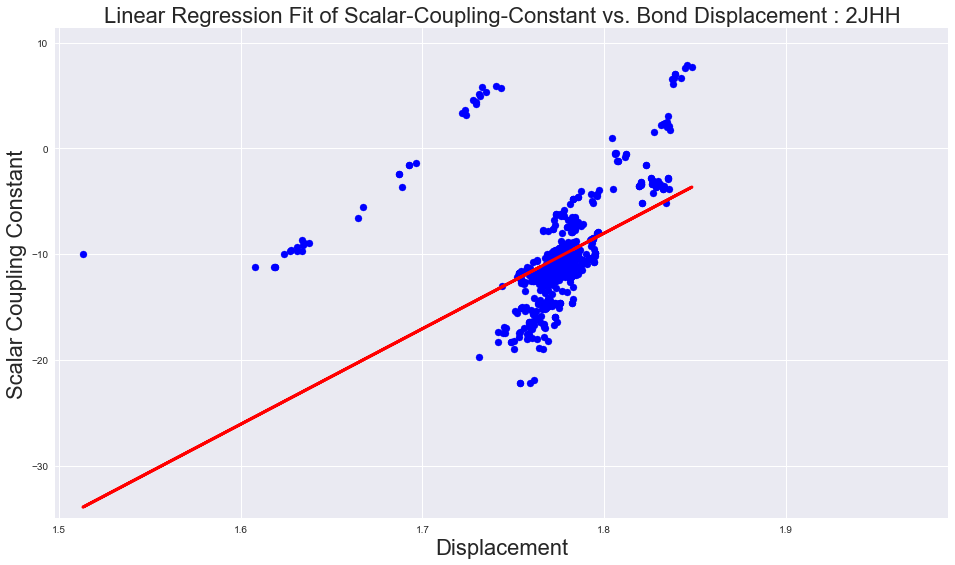

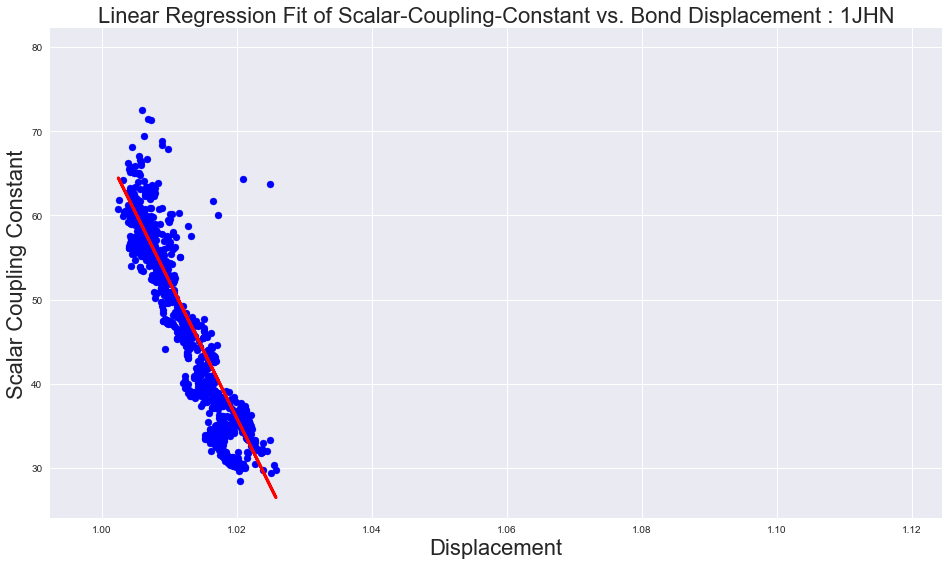

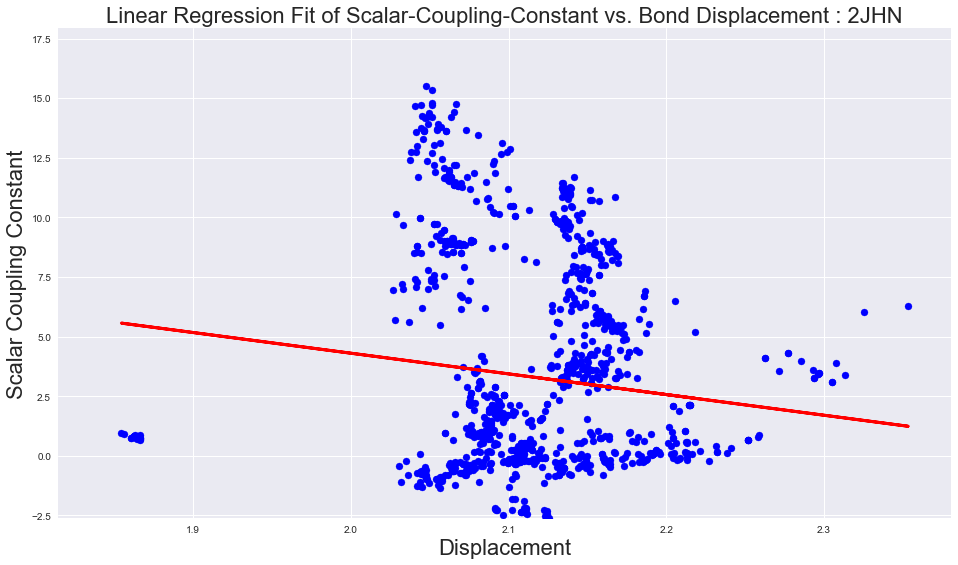

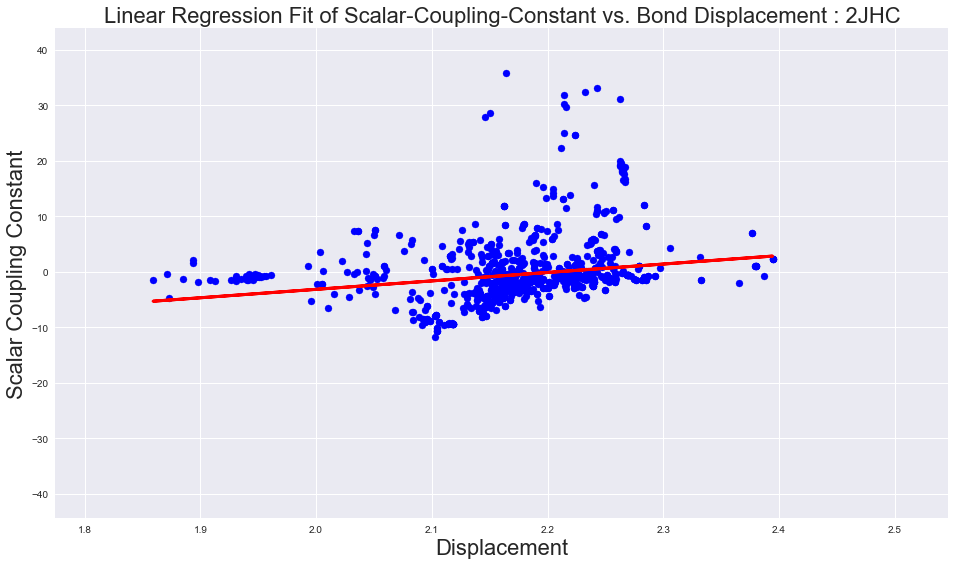

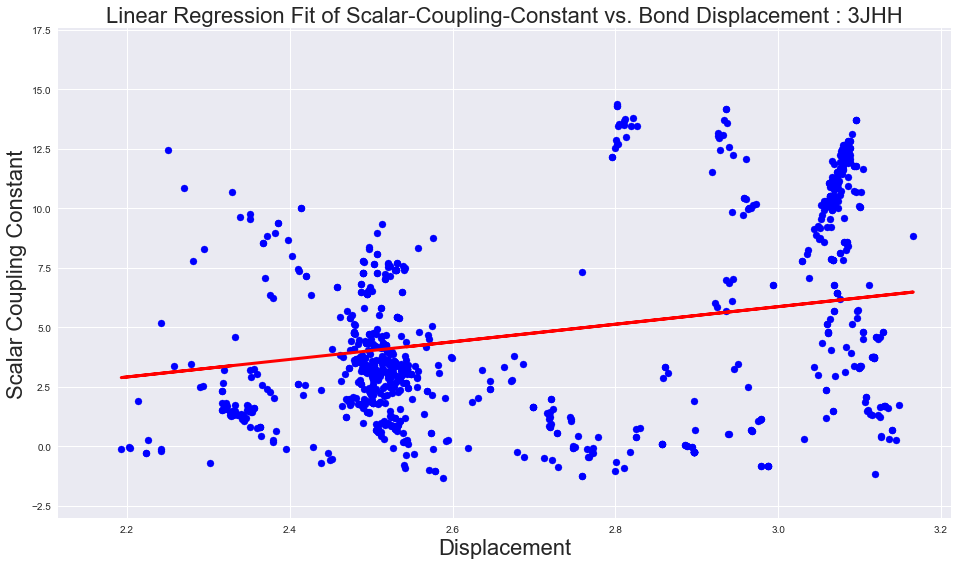

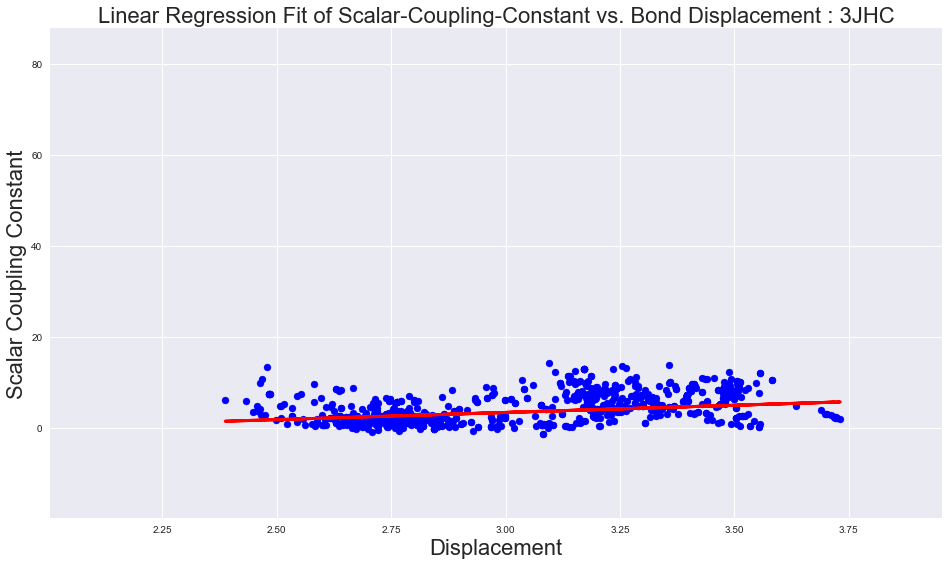

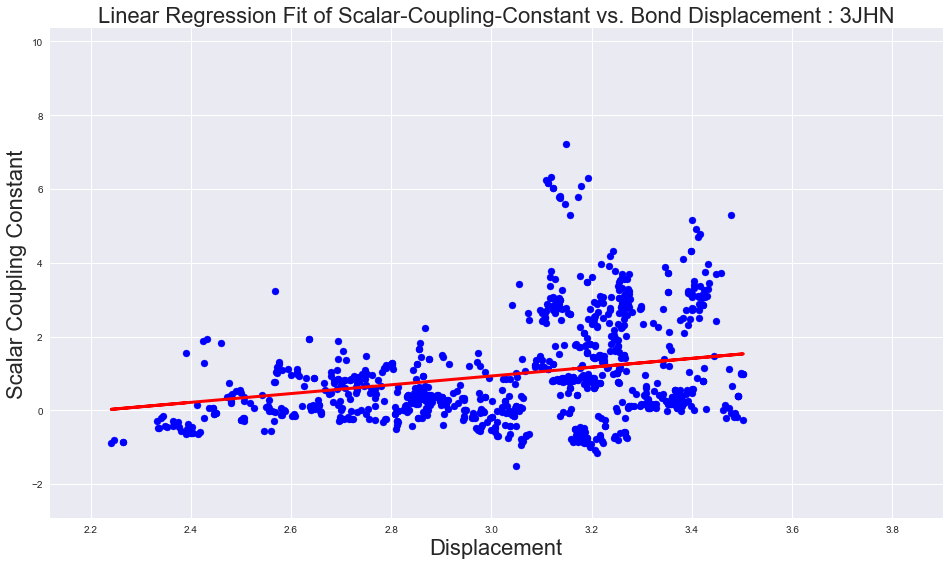

In [27]:
for bond_type in bond_types:
    linear_fit_plot(bond_df, bond_type, n=1000)

# Random Forest Regression
* [scikit Learn Random Forest Regression](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [41]:
def random_forest_plot(df, bond_type, n=0):
    # Get x and y arrays for bond type
    x,y = get_regression_datas( get_bond_type(df, bond_type) )

    # Get test data
    x_test = test_bond_df.displacement.values

    # Train Random Forest
    reg = RandomForestRegressor(max_depth=2, random_state=0)
    reg.fit(x.reshape(-1,1), y)

    # How many data points to plot
    if( n==0 ):
        n = x.size
    # Split n samples
    x_n = x[:n]
    y_n = y[:n]
    x_n.sort()
    
#     x_test_n = x_test[:n]
#     x_test_n.sort()
    
    # Scatter Plot of data points
    plt.scatter(x_n, y_n,c='b')
    plt.plot(x_n, reg.predict(x_n.reshape(-1,1)), c='r', linewidth=3, linestyle='solid')

    # Plot linear fit
    plt.xlim([x.min() * 0.99,x.max() * 1.01])
    plt.ylim([y.min() * 0.99,y.max() * 1.01])
    plt.title("Random Forest Regression of Scalar-Coupling-Constant vs. Bond Displacement : " + str(bond_type), size=22)
    plt.xlabel('Displacement', size=22)
    plt.ylabel('Scalar Coupling Constant', size=22)
    plt.show()

c:\users\root\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


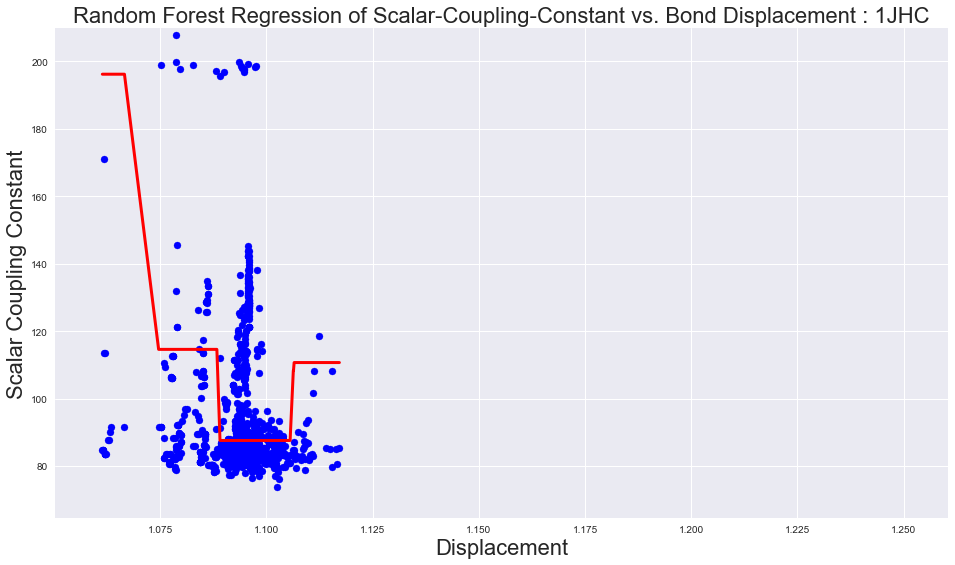

c:\users\root\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


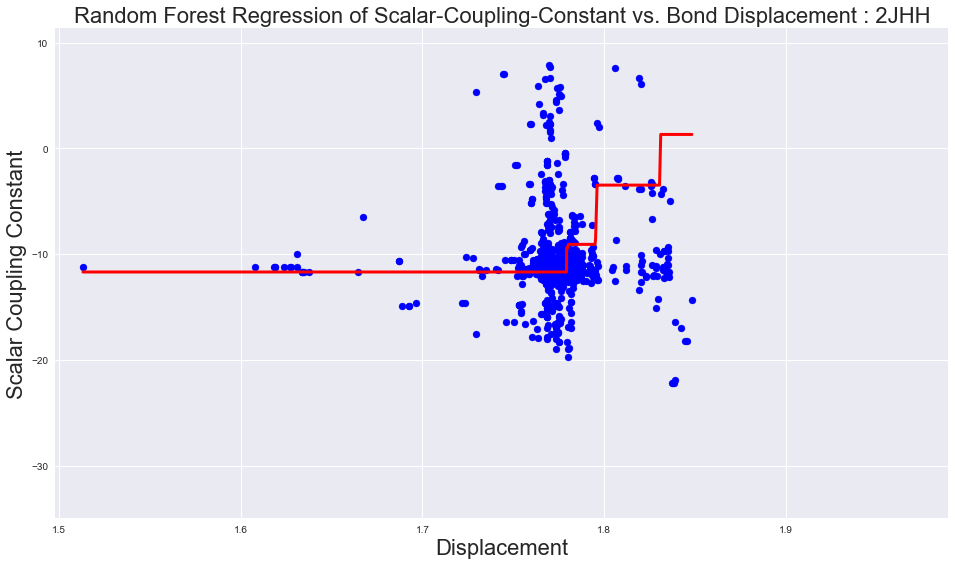

c:\users\root\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


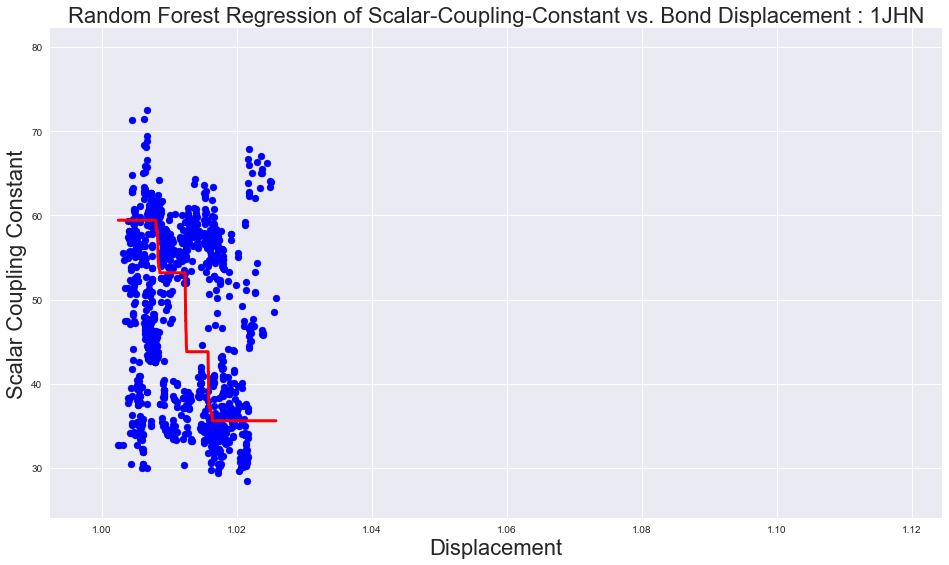

c:\users\root\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


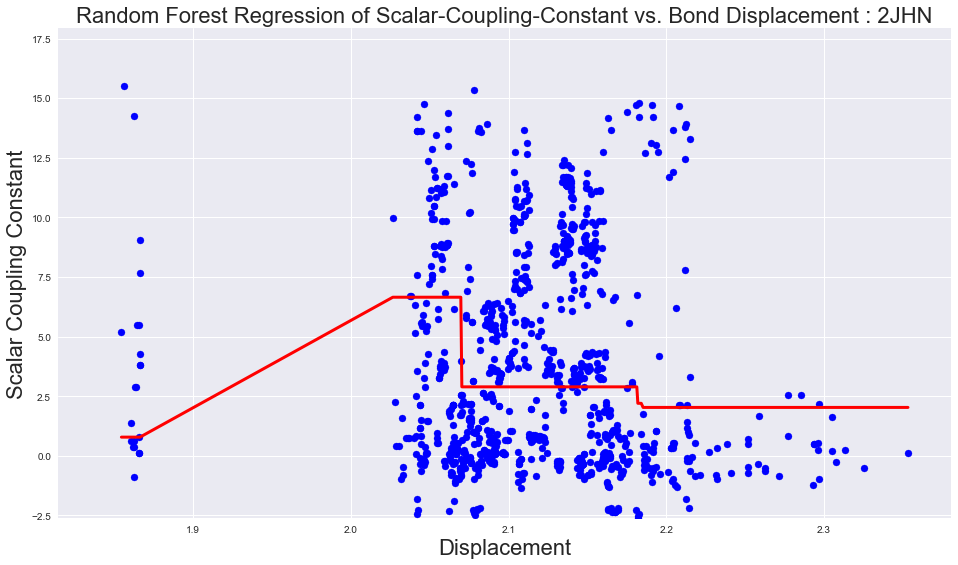

c:\users\root\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


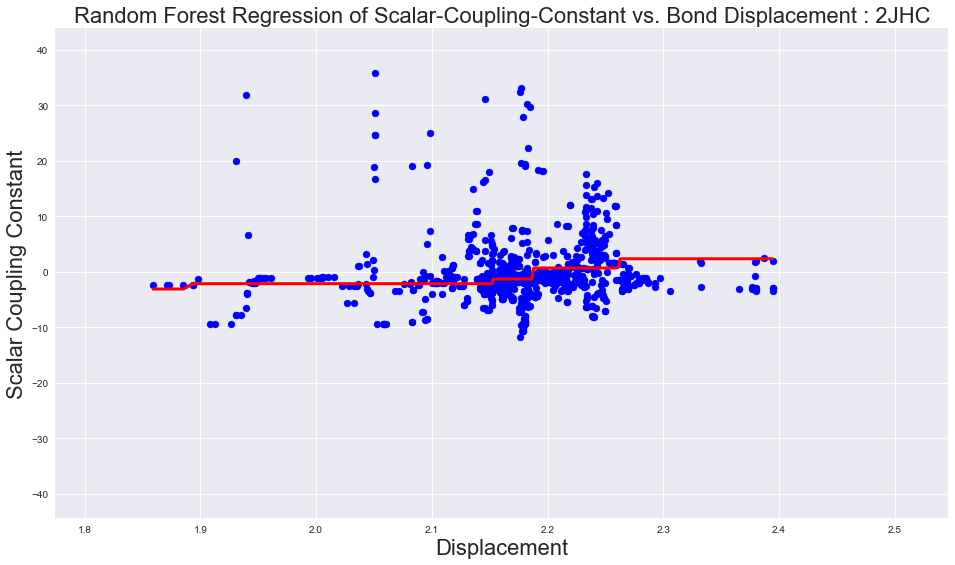

c:\users\root\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


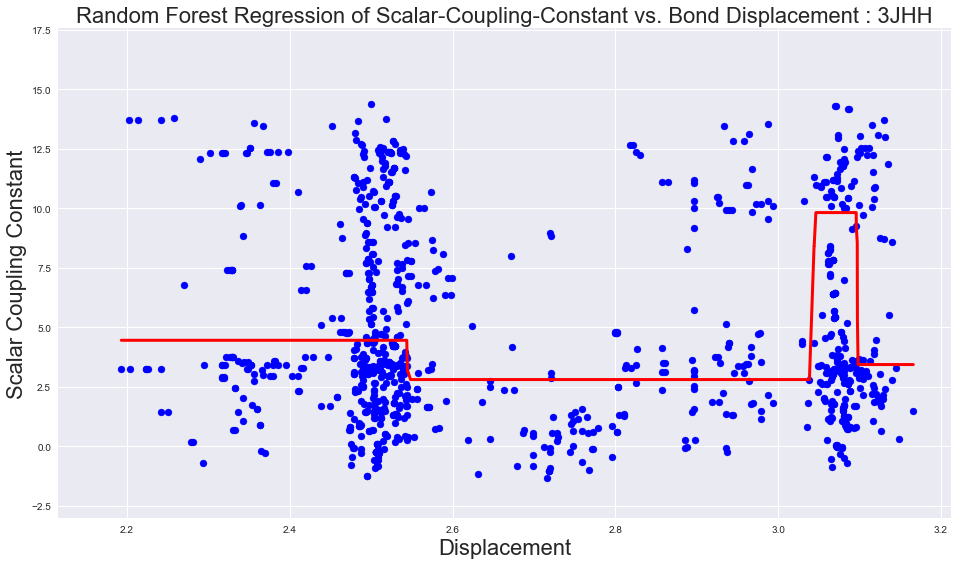

c:\users\root\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


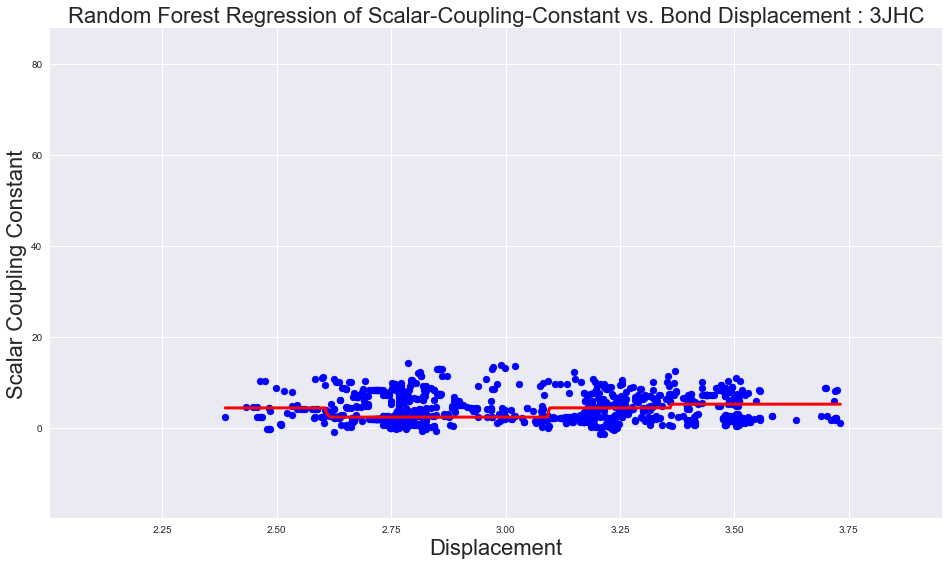

c:\users\root\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


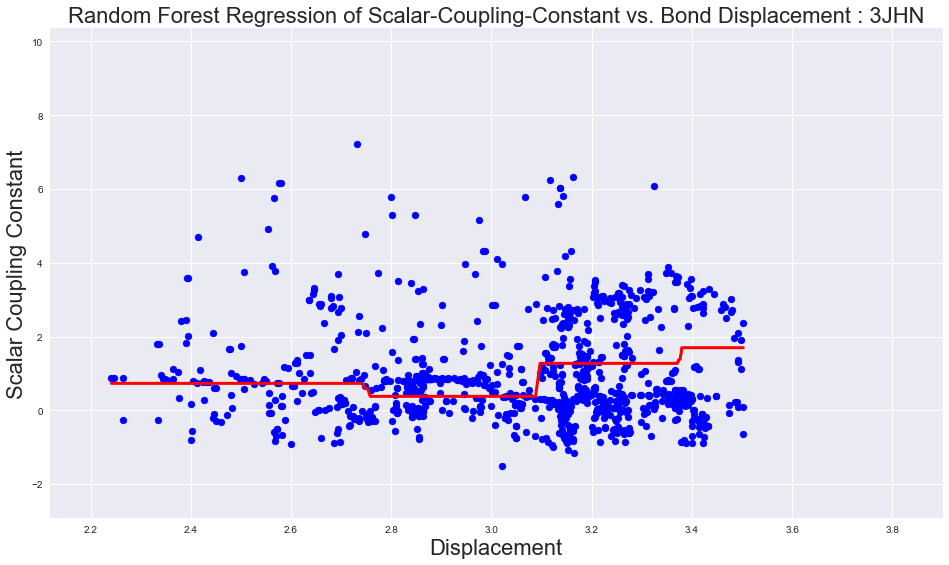

In [42]:
for bond_type in bond_types:
    random_forest_plot(bond_df, bond_type, n=1000)

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

<small><small><small>This holds space so I can scroll further</small></small></small>